In [1]:
from google.colab import files
uploaded = files.upload()

Saving SGlang_benchmark_results.csv to SGlang_benchmark_results.csv
Saving vLLM_benchmark_results.csv to vLLM_benchmark_results.csv


In [2]:
import pandas as pd

df_sg = pd.read_csv("/content/SGlang_benchmark_results.csv")
df_vl = pd.read_csv("/content/vLLM_benchmark_results.csv")

df_sg["framework"] = "SGLang"
df_vl["framework"] = "vLLM"

df = pd.concat([df_sg, df_vl], ignore_index=True)

In [3]:
df

,workload,batch_size,max_new_tokens,latency_s_per_batch,out_tokens_total,tokens_per_s,latency_s_per_request,gpu_util_mean_%,gpu_util_max_%,mem_used_mean_mb,mem_used_max_mb,framework
0,short,1,32,0.088902,32,359.948037,0.088902,4.000000,4,67934.125,67934.125,SGLang
1,short,2,32,0.159542,64,401.147211,0.079771,61.000000,61,67934.125,67934.125,SGLang
2,short,4,32,0.315734,128,405.404861,0.078933,52.000000,57,67934.125,67934.125,SGLang
3,short,8,32,0.633303,256,404.229744,0.079163,64.000000,76,67934.125,67934.125,SGLang
4,short,16,32,1.269077,512,403.442791,0.079317,62.285714,77,67934.125,67934.125,SGLang
...,...,...,...,...,...,...,...,...,...,...,...,...
115,long,1,256,0.672283,256,380.791830,0.672283,66.000000,68,74872.125,74872.125,vLLM
116,long,2,256,0.738378,512,693.411816,0.369189,56.750000,71,74872.125,74872.125,vLLM
117,long,4,256,0.767510,1024,1334.184865,0.191877,60.750000,68,74872.125,74872.125,vLLM
118,long,8,256,0.799137,2048,2562.765198,0.099892,62.250000,70,74872.125,74872.125,vLLM


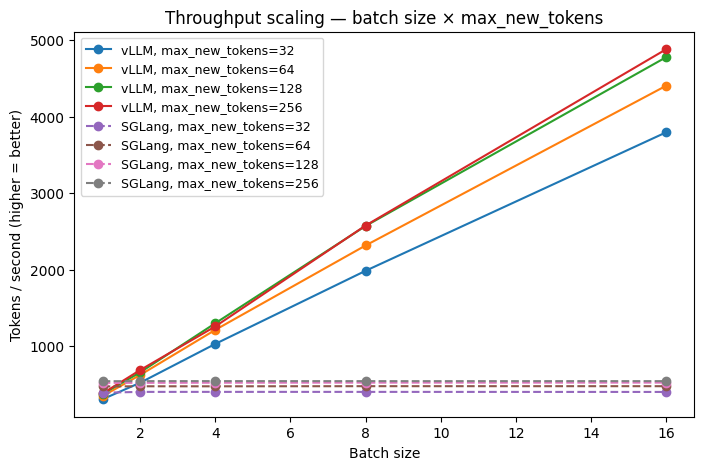

In [6]:
# # Basic comparison plot (Tokens/sec vs Batch Size)

# import matplotlib.pyplot as plt

# plt.figure()
# for fw in df["framework"].unique():
#     sub = df[df["framework"] == fw]
#     mean_sub = sub.groupby("batch_size")["tokens_per_s"].mean()
#     plt.plot(mean_sub.index, mean_sub.values, marker="o", label=fw)

# plt.xlabel("Batch size")
# plt.ylabel("Tokens per second")
# plt.title("Throughput comparison: vLLM vs SGLang")
# plt.legend()
# plt.grid(True)
# plt.show()

import matplotlib.pyplot as plt

frameworks = ["vLLM", "SGLang"]
max_new_tokens_list = sorted(df["max_new_tokens"].unique())
workloads = ["short", "medium", "long"]

plt.figure(figsize=(8, 5))

for fw in frameworks:
    for m in max_new_tokens_list:
        sub = df[
            (df["framework"] == fw) &
            (df["max_new_tokens"] == m)
        ].groupby("batch_size")["tokens_per_s"].mean().reset_index()

        plt.plot(
            sub["batch_size"],
            sub["tokens_per_s"],
            marker="o",
            linestyle="-" if fw == "vLLM" else "--",
            label=f"{fw}, max_new_tokens={m}"
        )

plt.xlabel("Batch size")
plt.ylabel("Tokens / second (higher = better)")
plt.title("Throughput scaling — batch size × max_new_tokens")
plt.legend(fontsize=9)
plt.show()

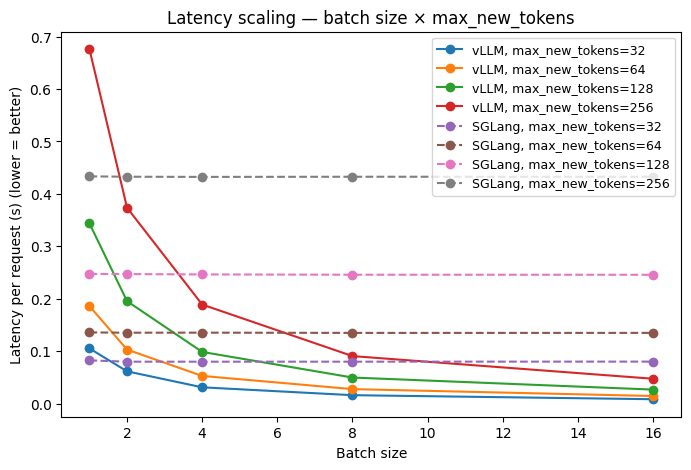

In [7]:
plt.figure(figsize=(8, 5))

for fw in frameworks:
    for m in max_new_tokens_list:
        sub = df[
            (df["framework"] == fw) &
            (df["max_new_tokens"] == m)
        ].groupby("batch_size")["latency_s_per_request"].mean().reset_index()

        plt.plot(
            sub["batch_size"],
            sub["latency_s_per_request"],
            marker="o",
            linestyle="-" if fw == "vLLM" else "--",
            label=f"{fw}, max_new_tokens={m}"
        )

plt.xlabel("Batch size")
plt.ylabel("Latency per request (s) (lower = better)")
plt.title("Latency scaling — batch size × max_new_tokens")
plt.legend(fontsize=9)
plt.show()

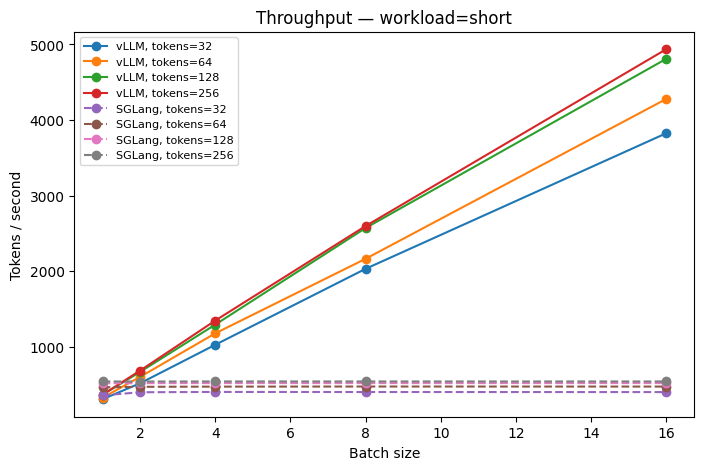

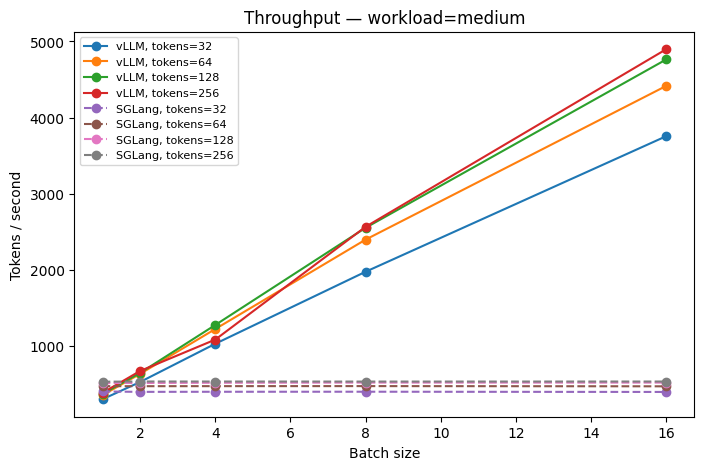

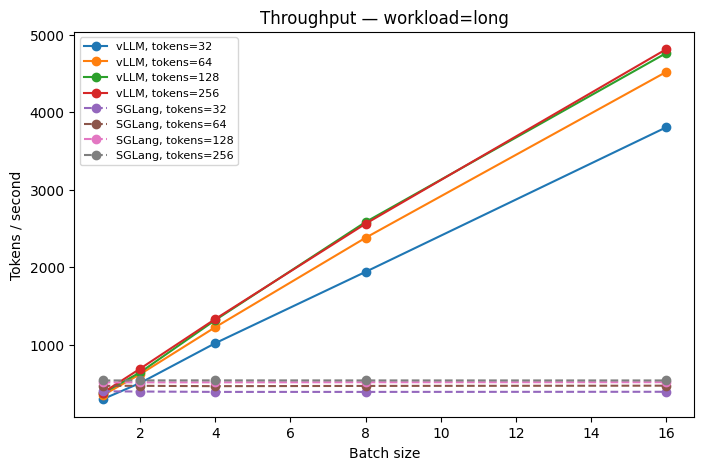

In [8]:
# Separate by workload

for w in workloads:
    plt.figure(figsize=(8, 5))

    for fw in frameworks:
        for m in max_new_tokens_list:
            sub = df[
                (df["workload"] == w) &
                (df["framework"] == fw) &
                (df["max_new_tokens"] == m)
            ]

            plt.plot(
                sub["batch_size"],
                sub["tokens_per_s"],
                marker="o",
                linestyle="-" if fw == "vLLM" else "--",
                label=f"{fw}, tokens={m}"
            )

    plt.xlabel("Batch size")
    plt.ylabel("Tokens / second")
    plt.title(f"Throughput — workload={w}")
    plt.legend(fontsize=8)
    plt.show()

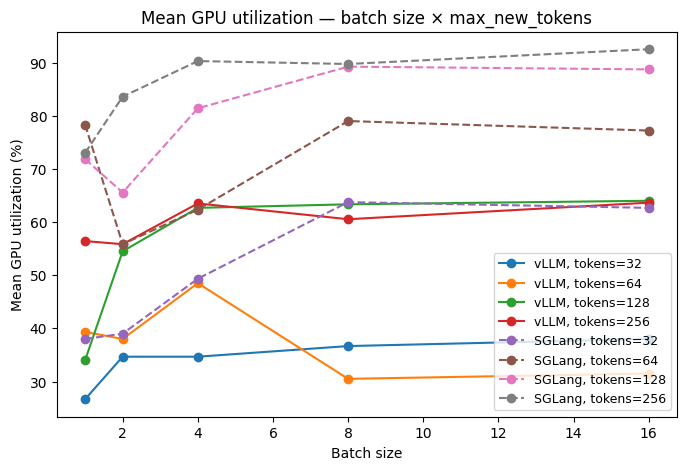

In [9]:
# Mean GPU utilization

plt.figure(figsize=(8, 5))

for fw in frameworks:
    for m in max_new_tokens_list:
        sub = df[
            (df["framework"] == fw) &
            (df["max_new_tokens"] == m)
        ].groupby("batch_size")["gpu_util_mean_%"].mean().reset_index()

        plt.plot(
            sub["batch_size"],
            sub["gpu_util_mean_%"],
            marker="o",
            linestyle="-" if fw == "vLLM" else "--",
            label=f"{fw}, tokens={m}"
        )

plt.xlabel("Batch size")
plt.ylabel("Mean GPU utilization (%)")
plt.title("Mean GPU utilization — batch size × max_new_tokens")
plt.legend(fontsize=9)
plt.show()

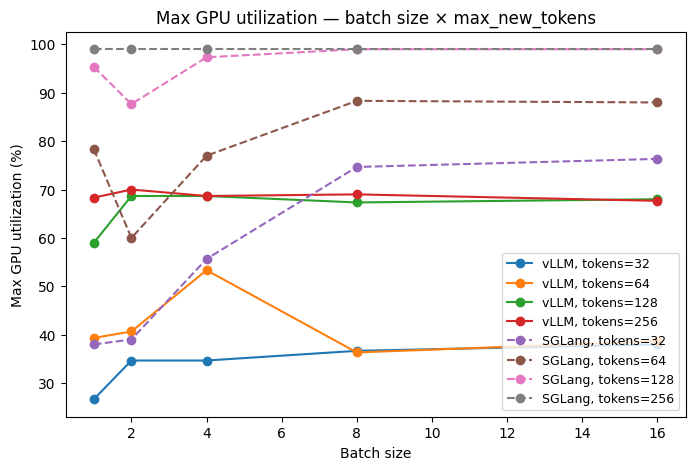

In [11]:
# Max GPU utilization

plt.figure(figsize=(8, 5))

for fw in frameworks:
    for m in max_new_tokens_list:
        sub = df[
            (df["framework"] == fw) &
            (df["max_new_tokens"] == m)
        ].groupby("batch_size")["gpu_util_max_%"].mean().reset_index()

        plt.plot(
            sub["batch_size"],
            sub["gpu_util_max_%"],
            marker="o",
            linestyle="-" if fw == "vLLM" else "--",
            label=f"{fw}, tokens={m}"
        )

plt.xlabel("Batch size")
plt.ylabel("Max GPU utilization (%)")
plt.title("Max GPU utilization — batch size × max_new_tokens")
plt.legend(fontsize=9)
plt.show()